### Analysis and visualization

In [9]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

What I want to check is the relation between the retweets and the favorit count.
My first suggestions is that both variables could be related. The higher the number of retweets the higher of favorite count. 

In [10]:
archive_clean3 = pd.read_csv('twitter_archive_master.csv')

Text(0.5,1,'Retweets vs Favorites')

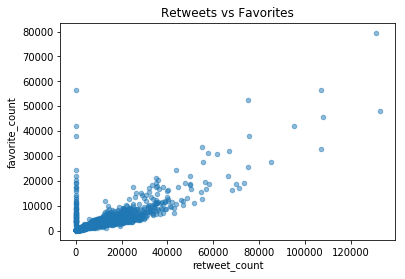

In [11]:
archive_clean3.plot(kind='scatter', x='favorite_count', y='retweet_count', alpha = 0.5)
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.title('Retweets vs Favorites')

Creating a scatterplot we see that there is at least a visual relation between each variable. Increasing the number of retweets we get higher number of favorites.

I want to check it programmatically by running the pearson correlation test in pandas

In [12]:
r = archive_clean3.corr(method="pearson")["favorite_count"]["retweet_count"]
print(r)

0.790476078845


There is a high correlation, not lineal, but strong enough to consider it high (0,79), between the variable "retweet count" and "favorite count". The nearer to the value: 1, the stronger the correlation.

We can have a deeper understanding of favorite and retweet distribution if we look to the "dog_stage".
First of all I want to know how the dog_stages are distributed by number of rows.

In [13]:
prop =archive_clean3.groupby(["dog_stage"])
prop["tweet_id"].count()

dog_stage
None       1753
doggo        67
floofer       8
pupper      221
puppo        24
Name: tweet_id, dtype: int64

 What we observe is that the "None"-group is the highest in number. But we can "iterate the cleaning".

Definition: To clean the "dog_stages" variable of missing data ("None")

Coding and testing:

In [14]:
prop2 = archive_clean3[archive_clean3['dog_stage'] != 'None'].groupby(["dog_stage"])
prop2["tweet_id"].count()

dog_stage
doggo       67
floofer      8
pupper     221
puppo       24
Name: tweet_id, dtype: int64

What we get is information about the distribution of number of rows per dog_stages groups without the missing values.

And now what I´m looking for is for the number of "retweets" and "favorites" in relation to the dog_stages without the missing values.

In [15]:
prop3 = archive_clean3[archive_clean3['dog_stage'] != 'None'].groupby(["dog_stage"])
prop3["retweet_count", "favorite_count"].sum()

,retweet_count,favorite_count
dog_stage,,
doggo,529404,1219452
floofer,38214,109611
pupper,576216,1573939
puppo,167119,522650


And what we get is the distribution of the sum of retweets and favorites for each group. The highest number of retweets and favorites are for the pupper group, followed by the doggo, then the puppo and the less retweeted and favorites are the floofer.
As expected we see that retweet and favorites are correlated also by the groups. The groups with the highest rates of retweets are also teh groups with the highest rates in favorites and this happens also in the less retweeted groups.